Author: Aditya Joshi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('/Users/adityajoshi/DataSets/Datasets/Titanic/Titanic_train.csv')
data_test = pd.read_csv('/Users/adityajoshi/DataSets/Datasets/Titanic/Titanic_test.csv')
data_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


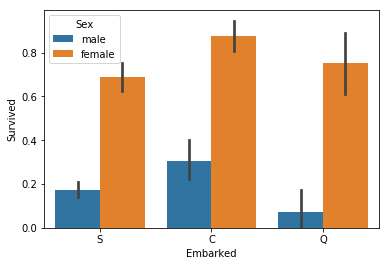

In [3]:
#Embarked vs Survived
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);
plt.show()

In [4]:
#Pclass vs Survived with gender classification
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

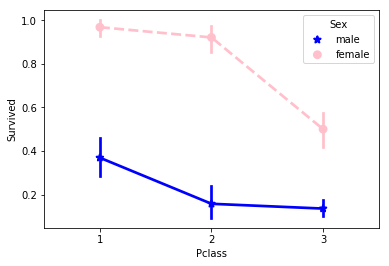

In [5]:
plt.show()

In [6]:
#No missing val in Survived
data_train['Survived'].isnull().sum()

0

In [7]:
#Drop Survived from train
survived = data_train['Survived']
data_train.drop('Survived',axis = 1,inplace = True)

In [8]:
#Passenger ID not important while training
data_test['PassengerId'].isnull().sum()

0

In [9]:
Pssid = data_test['PassengerId']

In [10]:
train_test = pd.concat([data_train,data_test],keys = ['train','test'],names = ['dataset','index'])
train_test.head()

PassengerId  Pclass  \
dataset index                        
train   0                1       3   
        1                2       1   
        2                3       3   
        3                4       1   
        4                5       3   

                                                            Name     Sex  \
dataset index                                                              
train   0                                Braund, Mr. Owen Harris    male   
        1      Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
        2                                 Heikkinen, Miss. Laina  female   
        3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
        4                               Allen, Mr. William Henry    male   

                Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
dataset index                                                                
train   0      22.0      1      0         A/5 21171   7.2500   NaN        S  
        1      38.0      1      0          PC 17599  71.2833   C85        C  
        2      26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
        3      35.0      1      0            113803  53.1000  C123        S  
        4      35.0      0      0            373450   8.0500   NaN        S

In [11]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 0) to (test, 417)
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.4+ KB


In [12]:
#Drop 'PassengerId','Ticket','Name'
train_test.drop(['PassengerId','Ticket','Name'],axis = 1,inplace=True)
train_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 0) to (test, 417)
Data columns (total 8 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 92.7+ KB


In [13]:
train_test.isnull().sum()

Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [14]:
1014 / float(1307)

0.7758224942616679

In [15]:
#More than 75% missing vals in Cabin
train_test.drop(['Cabin'],axis=1,inplace=True)

In [16]:
#Fill missing vals in other cols
avgAge = train_test['Age'].mean()

In [17]:
train_test['Age'] = train_test['Age'].fillna(avgAge)

In [18]:
avgAge

29.881137667304014

In [19]:
train_test['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [20]:
train_test['Embarked'] = train_test['Embarked'].fillna('S')

In [21]:
train_test['Fare'] = train_test['Fare'].fillna(train_test['Fare'].mean())

In [22]:
#No missing val
train_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
train = train_test.loc['train']
test = train_test.loc['test']

In [24]:
train['Survived'] = survived

/Users/adityajoshi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
index,,,,,,,,
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [26]:
train.shape

(891, 8)

In [27]:
survived.shape

(891,)

In [28]:
#EDA 

plt.figure(figsize=(12,6))
g = sns.countplot(x = survived,data=train,hue='Sex')
for p in g.patches:
    g.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points')

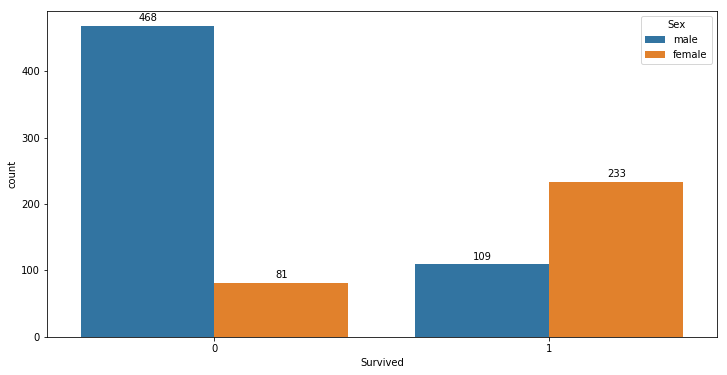

In [29]:
plt.show()

In [30]:
1-train.groupby(by = 'Sex')['Survived'].mean()

Sex
female    0.257962
male      0.811092
Name: Survived, dtype: float64

In [31]:
#Ratio of Males lost relative to the females lost
.81/.25

3.24

In [32]:
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'Pclass',data = train)
for p in g.patches:
        g.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points')

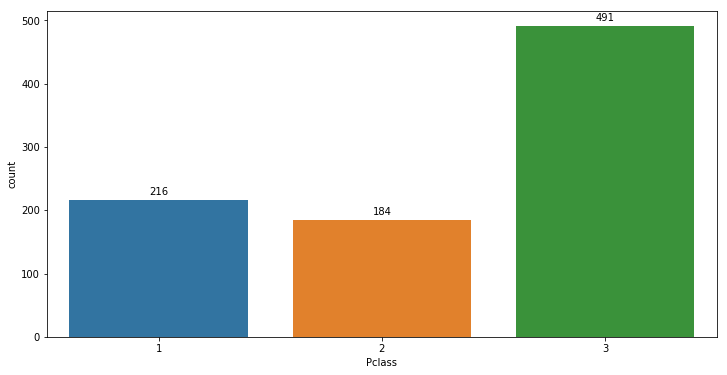

In [33]:
plt.show()

In [34]:
1-train.groupby(by = 'Pclass')['Survived'].mean()

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Survived, dtype: float64

In [35]:
1-train.groupby(by = 'Embarked')['Survived'].mean()

Embarked
C    0.446429
Q    0.610390
S    0.660991
Name: Survived, dtype: float64

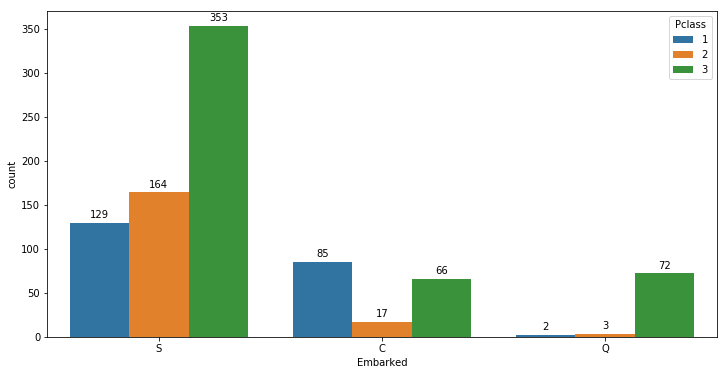

In [36]:
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'Embarked',data = train,hue = 'Pclass')
for p in g.patches:
        g.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

In [37]:
g = sns.FacetGrid(train,row='Pclass',col='Embarked',size=5,aspect=0.7)
g = (g.map(sns.countplot,'Survived',hue='Sex',data=train,palette='Set1')).add_legend()
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points')

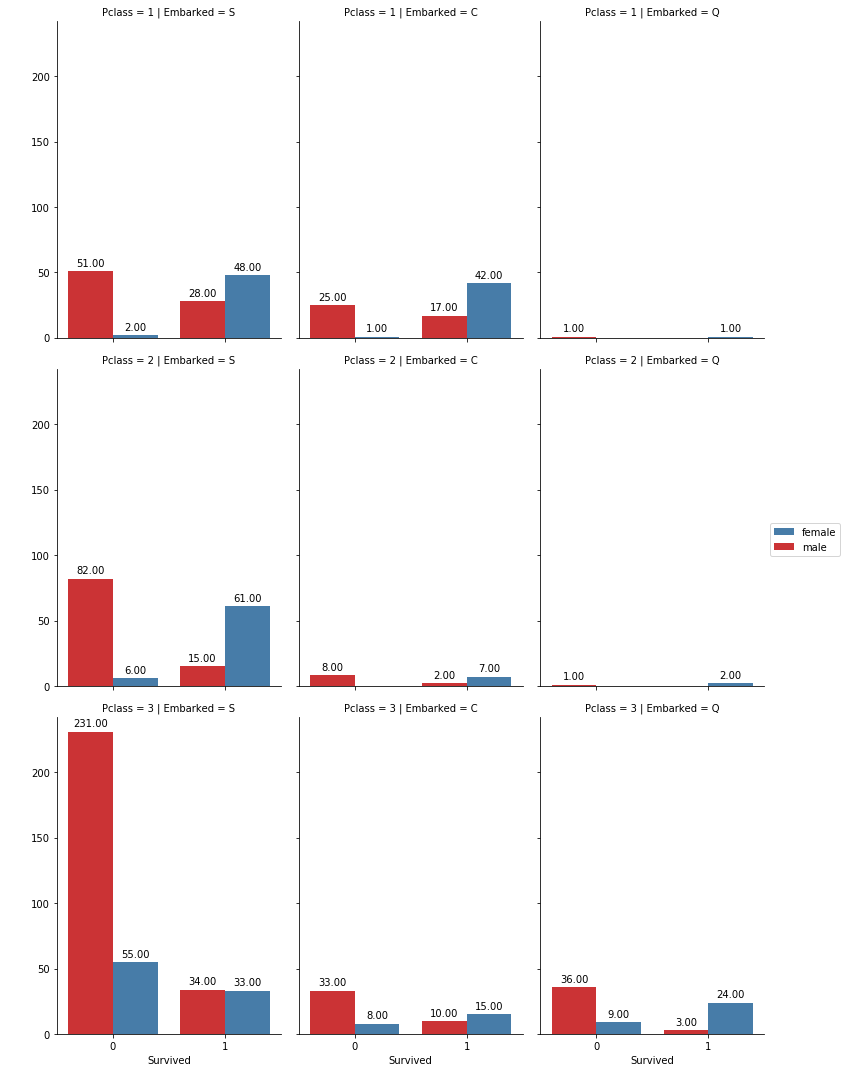

In [38]:
plt.show()

In [39]:
ECS = pd.DataFrame(train.groupby(by = ['Embarked','Pclass'])['Sex'].value_counts())

In [40]:
ECS_per = pd.DataFrame(1 - train.groupby(by = ['Embarked','Pclass','Sex'])['Survived'].mean())


In [41]:
#ECS_per = pd.DataFrame(round(1 - train.groupby(by = ['Embarked','Pclass','Sex'])['Survived'].mean(),3))
#ECS_per = pd.DataFrame(1 - train.groupby(by = ['Embarked','Pclass','Sex'])['Survived'].mean(),3)
ECS_lost = pd.DataFrame(train.groupby(by = ['Embarked','Pclass'])['Sex'].value_counts() - train.groupby(by = ['Embarked', 'Pclass', 'Sex'])['Survived'].sum())
ECS = pd.concat([ECS, ECS_lost,ECS_per], axis = 1)
ECS.columns = ['Total number of passengers', 'Number of passengers lost','Percentage of passengers lost']
ECS = ECS.style.set_properties(**{'text-align': 'right'})
ECS

In [42]:
#Age
train['Age'].describe()

count    891.000000
mean      29.735277
std       13.002218
min        0.420000
25%       22.000000
50%       29.881138
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
plt.figure(figsize=(16,6))
sns.distplot(train['Age'],kde=False,bins=150)

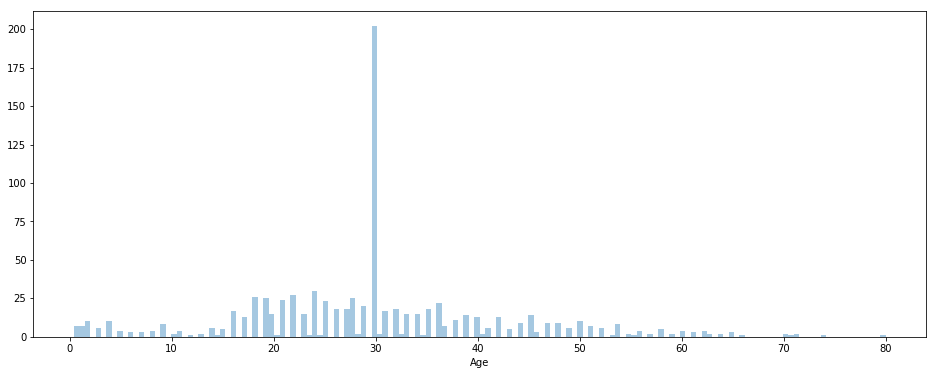

In [44]:
plt.show()

In [45]:
train.groupby(by = 'Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,28.247453,12.881271,0.75,21.0,29.881138,35.0,63.0
male,577.0,30.544941,13.007263,0.42,23.0,29.881138,35.0,80.0


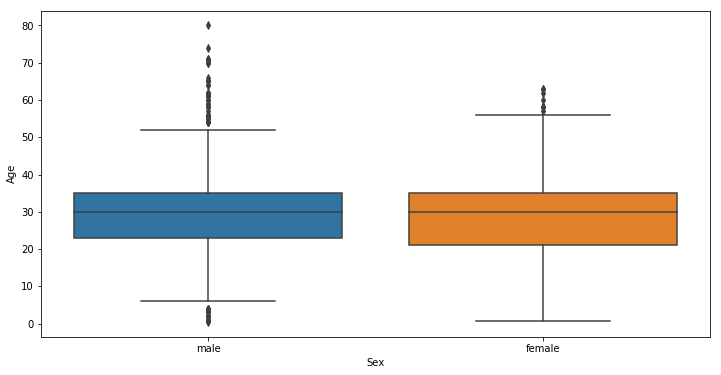

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Sex',y = 'Age',data = train)
plt.show()

In [47]:
#Fare

In [48]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

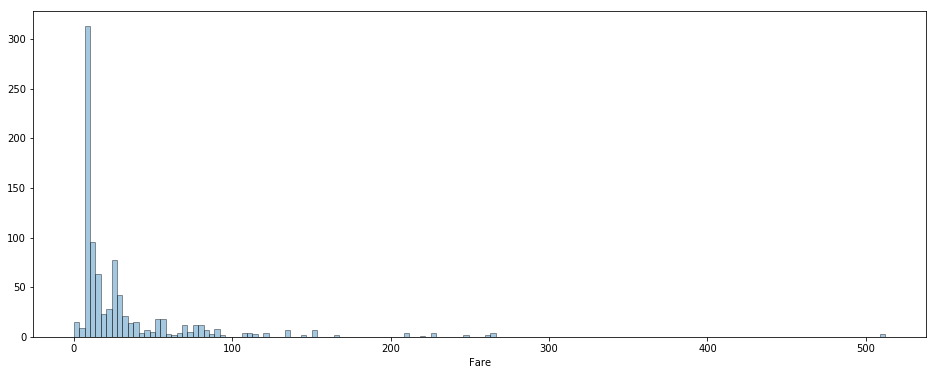

In [49]:
plt.figure(figsize=(16,6))
sns.distplot(train['Fare'],hist_kws={'edgecolor':'k'}, kde=False,bins=150)
plt.show()

In [50]:
#Applying ML algorithms.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import statsmodels.api as sm
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

/Users/adityajoshi/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [51]:
train_get_dummy = pd.get_dummies(columns=['Sex', 'Pclass', 'Embarked'], drop_first = True, data = train)

In [52]:
train_get_dummy.head()

,Age,SibSp,Parch,Fare,Survived,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
index,,,,,,,,,,
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,1,0,1


In [53]:
def forward_stepwise_selection(df):
    p = len(df.columns)
    X = df.drop('Survived',axis = 1)
    columns = list(X.columns)
    y = df['Survived']
    best_cols_global = []
    for col1 in columns:
        max_score = -1
        for col2 in columns:
            model = LogisticRegression()
            if col2 not in best_cols_global:
                cols = best_cols_global[:]
                cols.append(col2)
                model.fit(X[cols],y)
                score = model.score(X[cols],y)
                if score > max_score:
                    max_score = score
                    best_col = col2
        if best_col not in best_cols_global:
            best_cols_global.append(best_col)
        print(best_cols_global, max_score)
        model = LogisticRegression()
        mean_score = cross_val_score(model,X[best_cols_global],y,cv = 5).mean()
        print('CV mean score is ', mean_score)

In [54]:
forward_stepwise_selection(train_get_dummy)

(['Sex_male'], 0.78675645342312006)
('CV mean score is ', 0.78671502492918788)
(['Sex_male', 'SibSp'], 0.7912457912457912)
('CV mean score is ', 0.78897491193483771)
(['Sex_male', 'SibSp', 'Pclass_3'], 0.80022446689113358)
('CV mean score is ', 0.79908734241274249)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S'], 0.80359147025813693)
('CV mean score is ', 0.80468021166137726)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S', 'Age'], 0.80471380471380471)
('CV mean score is ', 0.80246461878148945)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S', 'Age', 'Parch'], 0.8058361391694725)
('CV mean score is ', 0.79911273440157016)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S', 'Age', 'Parch', 'Fare'], 0.80920314253647585)
('CV mean score is ', 0.79910645733170627)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S', 'Age', 'Parch', 'Fare', 'Pclass_2'], 0.80920314253647585)
('CV mean score is ', 0.79463718358868951)
(['Sex_male', 'SibSp', 'Pclass_3', 'Embarked_S', 'Age', 'Parch', 'Fare', 'Pclass_2

In [55]:
def summary_results(df):
    x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived',axis = 1),df['Survived'],test_size = 0.3,random_state = 100)
    k_max = -10
    mean_score_max = -10
    for kk in range(1,20,2):
        KNN_model = KNeighborsClassifier(n_neighbors=kk)
        mean_score = cross_val_score(KNN_model,df.drop('Survived',axis = 1),df['Survived'],cv = 5).mean()
        if mean_score > mean_score_max:
            mean_score_max = mean_score
            k_max = kk
    print('The best K for KNN using 5 fold CV is',k_max)
    DC = DummyClassifier(strategy='most_frequent')
    LR = LogisticRegression()
    LDA = LinearDiscriminantAnalysis()
    QDA = QuadraticDiscriminantAnalysis()
    KNN = KNeighborsClassifier(n_neighbors=k_max)
    VC = VotingClassifier(estimators=[('lr',LR),('KNN',KNN)],voting='soft')
    classfiers = [DC,LR,KNN,VC]
    list_of_classifiers = ['Null Classifier','Logistic Regression','K-Nearest Neighbors','Voting Classifier']
    max_len = max(list_of_classifiers,key=len)
    
    
    i = 0
    for model in classfiers:
        model.fit(x_train, y_train)
        pred = model.predict(x_test) 
        Con_mat = confusion_matrix(y_test, pred)
        acc = (Con_mat[0,0]+Con_mat[1,1])/float((Con_mat[0,0]+Con_mat[0,1]+Con_mat[1,0]+Con_mat[1,1]))
        mean_score = cross_val_score(model, df.drop('Survived', axis = 1), df['Survived'], cv = 5).mean()
        diff = len(max_len)-len(list_of_classifiers[i])+5
        print('{}{}{:.3f}\t{:.3f}'.format(list_of_classifiers[i], ' '*diff, acc, mean_score))
        #print(list_of_classifiers[i], acc)
        i += 1

In [56]:
summary_results(train_get_dummy[['Survived','Sex_male','SibSp','Pclass_3','Age','Embarked_S']])

('The best K for KNN using 5 fold CV is', 11)
Null Classifier         0.593	0.616
Logistic Regression     0.799	0.802
K-Nearest Neighbors     0.750	0.780
Voting Classifier       0.832	0.825


In [57]:
test_get_dummies = pd.get_dummies(test,columns=['Sex','Pclass','Embarked'],drop_first=True)

In [58]:
test_get_dummies = test_get_dummies[['Sex_male','SibSp','Pclass_3','Age','Embarked_S']]

In [59]:
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=11)
best_classifier = VotingClassifier(estimators=[('lr',LR),('KNN',KNN)],voting='soft')

In [60]:
best_classifier.fit(train_get_dummy[['Sex_male','SibSp','Pclass_3','Age','Embarked_S']],train_get_dummy['Survived'])

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [61]:
PssID_df = pd.DataFrame(Pssid,columns=['PassengerId'])
PssID_df['Survived'] = best_classifier.predict(test_get_dummies)
PssID_df.to_csv('/Users/adityajoshi/DataSets/Datasets/Titanic/result.csv',index = False)

Accuracy on Kaggle: 0.75119